In [9]:
from scipy import ndimage
import numpy as np
import math as m
from scipy import misc
import scipy.stats as st
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
import cv2
plt.ion()
InteractiveShell.ast_node_interactivity='all'

In [2]:
def gkern(kernlen=21, nsig=3):
    """Returns a 2D Gaussian kernel array."""

    interval = (2*nsig+1.)/(kernlen)
    x = np.linspace(-nsig-interval/2., nsig+interval/2., kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kernel_raw = np.sqrt(np.outer(kern1d, kern1d))
    kernel = kernel_raw/kernel_raw.sum()
    return kernel

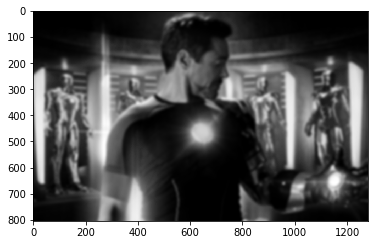

In [3]:
stark=cv2.imread('../CVHomework/HW1/stark.jpg',0)
gaussian_kernel=gkern()
stark_blur=ndimage.filters.convolve(stark,gaussian_kernel)
plt.imshow(stark_blur,cmap='gray')

<Figure size 432x288 with 0 Axes>

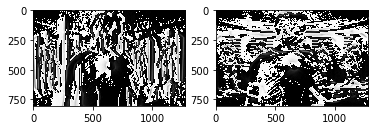

In [4]:
k=np.asarray([[0,-1,0],[-1,0,1],[0,1,0]])
sobel_x=np.asarray([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y=sobel_x.T
edge_x=ndimage.filters.convolve(stark_blur,sobel_x)
edge_y=ndimage.filters.convolve(stark_blur,sobel_y)
plt.figure()
plt.subplot(121)
plt.imshow(edge_x,cmap='gray')
plt.subplot(122)
plt.imshow(edge_y,cmap='gray')
plt.show()

In [5]:
stark.shape
biggerStark=np.zeros((3*804,3*1280))

(804, 1280)

In [6]:
biggerStark.shape

(2412, 3840)

In [7]:
for i in range(stark.shape[0]):
    for j in range(stark.shape[1]):
        biggerStark[3*i][3*j]=stark[i][j]
        

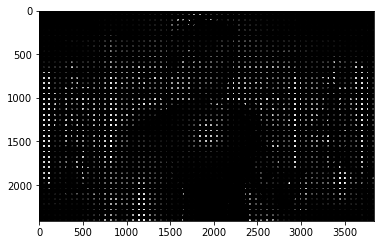

In [8]:
plt.imshow(biggerStark,cmap='gray')

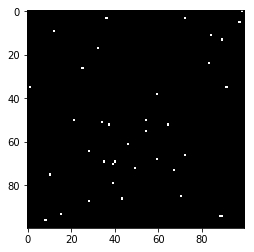

In [24]:
graph=np.random.random((100,100))
graph=graph>0.996
plt.imshow(graph,cmap='gray')

In [56]:
dots=[]
for i in range(100):
    for j in range(100):
        if graph[i][j]:
            dots.append((j,99-i))
dots

[(98, 99),
 (36, 96),
 (72, 96),
 (97, 94),
 (12, 90),
 (84, 88),
 (89, 86),
 (32, 82),
 (83, 75),
 (25, 73),
 (1, 64),
 (91, 64),
 (59, 61),
 (21, 49),
 (54, 49),
 (34, 48),
 (37, 47),
 (64, 47),
 (54, 44),
 (46, 38),
 (28, 35),
 (72, 33),
 (59, 31),
 (35, 30),
 (40, 30),
 (39, 29),
 (49, 27),
 (67, 26),
 (10, 24),
 (39, 20),
 (70, 14),
 (43, 13),
 (28, 12),
 (15, 6),
 (88, 5),
 (89, 5),
 (8, 3)]

<Figure size 432x288 with 0 Axes>

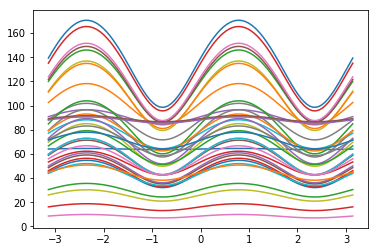

In [60]:
plt.figure()
plt.subplot(111)
theta=np.linspace(start=-m.pi,stop=m.pi,num=100)

for x,y in dots:
    rou=np.sqrt(x**2+y**2+x*y*np.sin(2*theta))
    plt.plot(theta,rou)

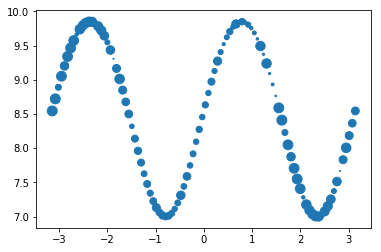

In [64]:
plt.scatter(theta,rou,dots)

<Figure size 432x288 with 0 Axes>

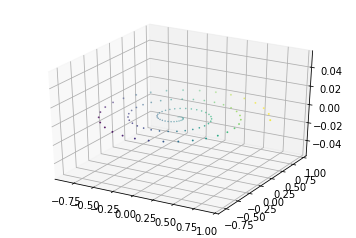

In [72]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure()
plt.axes(projection='3d')

z = np.linspace(0, 1, 100)
x = z * np.sin(20 * z)
y = z * np.cos(20 * z)

c = x + y

plt.scatter(x, y, z, c=c)